# Project 1
## COE379L: Software Design for Responsible Intelligent Systems
### Pranjal Adhikari, pa8729

In [171]:
# import libraries needed
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [145]:
# read data into variable auto
auto = pd.read_csv('https://raw.githubusercontent.com/joestubbs/coe379L-sp24/master/datasets/unit01/project1.data')

## Part 1: Exploratory Data Analysis

### Shape & Size

In [146]:
# print first 5 rows
auto.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [147]:
# shape of auto data set
auto.shape

(398, 9)

In [148]:
# size of auto data set
auto.size

3582

### Data Information & Conversion

In [149]:
# info about data types of each column
auto.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car_name      398 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


In [150]:
# unique values within horsepower column
auto['horsepower'].unique()

array(['130', '165', '150', '140', '198', '220', '215', '225', '190',
       '170', '160', '95', '97', '85', '88', '46', '87', '90', '113',
       '200', '210', '193', '?', '100', '105', '175', '153', '180', '110',
       '72', '86', '70', '76', '65', '69', '60', '80', '54', '208', '155',
       '112', '92', '145', '137', '158', '167', '94', '107', '230', '49',
       '75', '91', '122', '67', '83', '78', '52', '61', '93', '148',
       '129', '96', '71', '98', '115', '53', '81', '79', '120', '152',
       '102', '108', '68', '58', '149', '89', '63', '48', '66', '139',
       '103', '125', '133', '138', '135', '142', '77', '62', '132', '84',
       '64', '74', '116', '82'], dtype=object)

In [151]:
# values of '?' in horsepower column
auto[auto['horsepower'] == "?"]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name
32,25.0,4,98.0,?,2046,19.0,71,1,ford pinto
126,21.0,6,200.0,?,2875,17.0,74,1,ford maverick
330,40.9,4,85.0,?,1835,17.3,80,2,renault lecar deluxe
336,23.6,4,140.0,?,2905,14.3,80,1,ford mustang cobra
354,34.5,4,100.0,?,2320,15.8,81,2,renault 18i
374,23.0,4,151.0,?,3035,20.5,82,1,amc concord dl


In [152]:
# drop rows with values '?' in horsepower
auto_new = auto[auto != "?"].dropna()
auto_new['horsepower'].unique()

array(['130', '165', '150', '140', '198', '220', '215', '225', '190',
       '170', '160', '95', '97', '85', '88', '46', '87', '90', '113',
       '200', '210', '193', '100', '105', '175', '153', '180', '110',
       '72', '86', '70', '76', '65', '69', '60', '80', '54', '208', '155',
       '112', '92', '145', '137', '158', '167', '94', '107', '230', '49',
       '75', '91', '122', '67', '83', '78', '52', '61', '93', '148',
       '129', '96', '71', '98', '115', '53', '81', '79', '120', '152',
       '102', '108', '68', '58', '149', '89', '63', '48', '66', '139',
       '103', '125', '133', '138', '135', '142', '77', '62', '132', '84',
       '64', '74', '116', '82'], dtype=object)

In [153]:
# datatype conversion of horsepower from object to float
auto_new['horsepower'] = auto_new['horsepower'].astype(object).astype(float)
auto_new.info()

<class 'pandas.core.frame.DataFrame'>
Index: 392 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   cylinders     392 non-null    int64  
 2   displacement  392 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        392 non-null    int64  
 5   acceleration  392 non-null    float64
 6   model_year    392 non-null    int64  
 7   origin        392 non-null    int64  
 8   car_name      392 non-null    object 
dtypes: float64(4), int64(4), object(1)
memory usage: 30.6+ KB


In [154]:
# save auto_new into auto working data set
auto = auto_new

### Dropping Columns

In [155]:
# drop car_name column
auto.drop(['car_name'], axis=1, inplace=True)

### Missing Data

In [156]:
# determine if any data missing in columns
auto.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model_year      0
origin          0
dtype: int64

### Statistical Information

In [157]:
# statistical info of all columns
auto.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,23.445918,5.471939,194.411990,104.469388,2977.584184,15.541327,75.979592,1.576531
std,7.805007,1.705783,104.644004,38.491160,849.402560,2.758864,3.683737,0.805518
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.000000,4.000000,105.000000,75.000000,2225.250000,13.775000,73.000000,1.000000
50%,22.750000,4.000000,151.000000,93.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,275.750000,126.000000,3614.750000,17.025000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


In [158]:
# average mpg of cars grouped by year
auto.groupby(['model_year'])['mpg'].mean()

model_year
70    17.689655
71    21.111111
72    18.714286
73    17.100000
74    22.769231
75    20.266667
76    21.573529
77    23.375000
78    24.061111
79    25.093103
80    33.803704
81    30.185714
82    32.000000
Name: mpg, dtype: float64

### One-hot Encoding

In [159]:
# origin column: 1: American, 2, European, 3: Japanese
auto['origin'] = auto['origin'].astype("category")
auto = pd.get_dummies(auto, columns=['origin'], drop_first=True)

In [160]:
# new columns made titled "origin_2" & "origin_3" 
auto.info()

<class 'pandas.core.frame.DataFrame'>
Index: 392 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   cylinders     392 non-null    int64  
 2   displacement  392 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        392 non-null    int64  
 5   acceleration  392 non-null    float64
 6   model_year    392 non-null    int64  
 7   origin_2      392 non-null    bool   
 8   origin_3      392 non-null    bool   
dtypes: bool(2), float64(4), int64(3)
memory usage: 25.3 KB


### Visualization

Text(0.5, 1.0, 'Distriubtion of MPG')

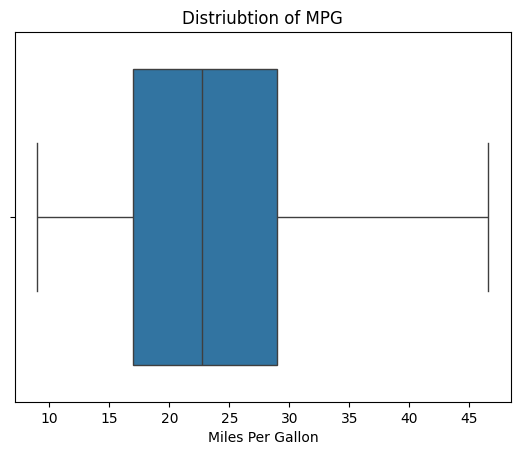

In [161]:
# univariate analysis

# boxplot of mpg in the data set
sns.boxplot(data=auto, x='mpg')
plt.xlabel("Miles Per Gallon")
plt.title("Distriubtion of MPG")

Text(0.5, 1.0, 'Count of Cylinders')

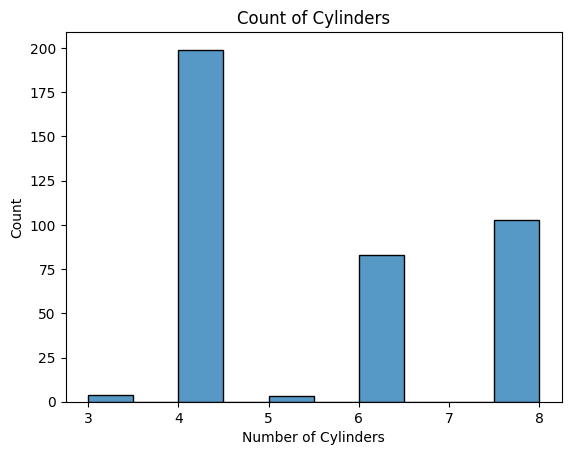

In [162]:
# histogram of cylinders in the data set
sns.histplot(data=auto, x='cylinders')
plt.xlabel("Number of Cylinders")
plt.title("Count of Cylinders")

Text(0.5, 1.0, 'MPG vs Weight')

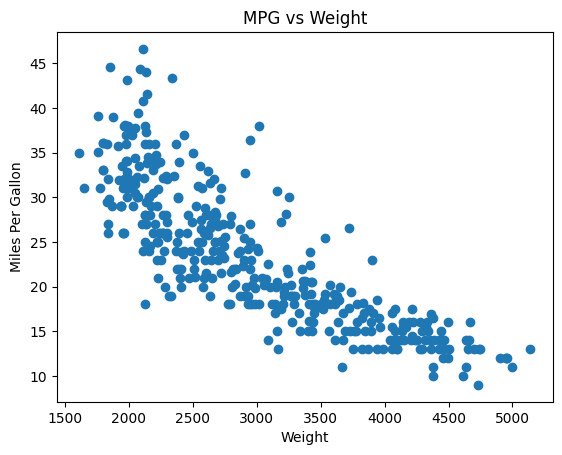

In [163]:
# bivariate analysis

# scatter plot of car weight vs mpg
plt.scatter(auto['weight'], auto['mpg'])
plt.xlabel("Weight")
plt.ylabel("Miles Per Gallon")
plt.title("MPG vs Weight")

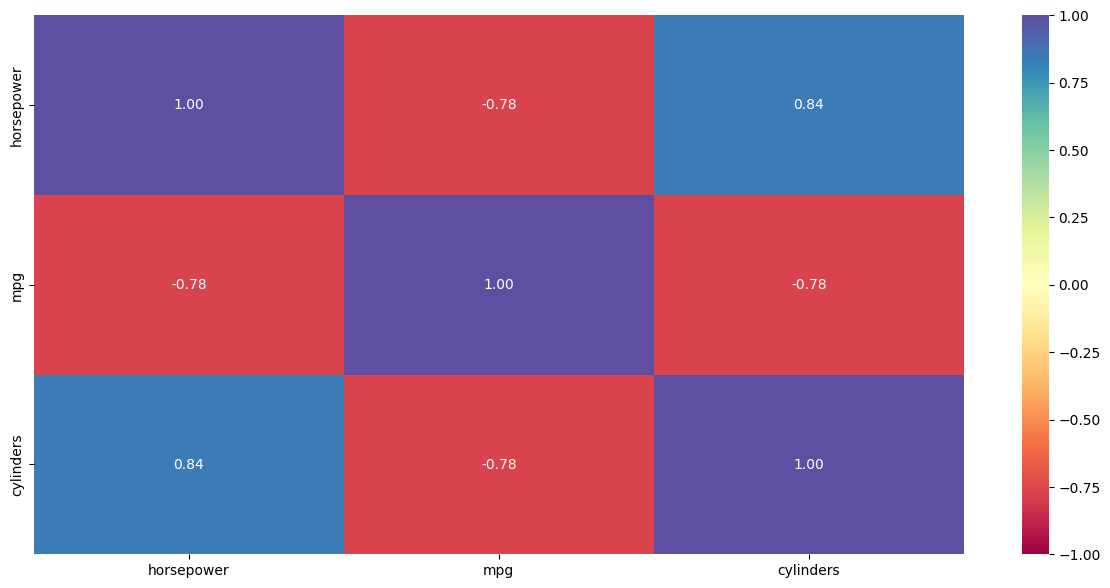

In [164]:
# heat map to visualize correlation of variables
corr_cols=['horsepower', 'mpg', 'cylinders']
plt.figure(figsize=(15, 7))
sns.heatmap(
   auto[corr_cols].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral"
)
plt.show()

### Correlations

In [165]:
# correlations between columns
auto.corr()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin_2,origin_3
mpg,1.000000,-0.777618,-0.805127,-0.778427,-0.832244,0.423329,0.580541,0.244313,0.451454
cylinders,-0.777618,1.000000,0.950823,0.842983,0.897527,-0.504683,-0.345647,-0.352324,-0.404209
displacement,-0.805127,0.950823,1.000000,0.897257,0.932994,-0.543800,-0.369855,-0.371633,-0.440825
horsepower,-0.778427,0.842983,0.897257,1.000000,0.864538,-0.689196,-0.416361,-0.284948,-0.321936
weight,-0.832244,0.897527,0.932994,0.864538,1.000000,-0.416839,-0.309120,-0.293841,-0.447929
acceleration,0.423329,-0.504683,-0.543800,-0.689196,-0.416839,1.000000,0.290316,0.208298,0.115020
model_year,0.580541,-0.345647,-0.369855,-0.416361,-0.309120,0.290316,1.000000,-0.037745,0.199841
origin_2,0.244313,-0.352324,-0.371633,-0.284948,-0.293841,0.208298,-0.037745,1.000000,-0.230157
origin_3,0.451454,-0.404209,-0.440825,-0.321936,-0.447929,0.115020,0.199841,-0.230157,1.000000


### Insights

## Part 2: Fit Regression Models

In [166]:
# import libraries needed
import sklearn
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

### Preparations

In [167]:
# save all variables but mpg as independent variables
X = auto.drop('mpg', axis=1)

# save mpg variable as dependent variable
y = auto['mpg']

### Splitting

In [168]:
# split into training & test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

### Fit Linear Regression

In [169]:
# linear model
auto_lr = linear_model.LinearRegression()

# fit linear regression
auto_lr.fit(X_train, y_train)

LinearRegression()

### Accuracy

In [170]:
# accuracy score for training set
print("Training set accuracy score:", auto_lr.score(X_train, y_train))

# accuracy score for test set
print("Test set accuracy score:", auto_lr.score(X_test, y_test))

Training set accuracy score: 0.8205337631867141
Test set accuracy score: 0.8242172817490035
